In [1]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 4.3.2"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 4.3.2"
Loaded glmnet 4.1-8



In [2]:
data <- read.csv("/Users/17718/Desktop/US_PCE_training.csv")
head(data)

,month,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X.40,X.41,X.42,X.43,X.44,X.45,X.46,X.47,X.48,X.49
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,Personal consumption expenditures,15.164,15.179,15.189,15.219,15.227,15.271,15.303,15.325,15.365,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,month,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,New domestic autos,37.337,37.337,37.481,37.409,37.553,37.625,37.625,37.553,37.697,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,New foreign autos,37.348,37.348,37.492,37.420,37.564,37.636,37.636,37.564,37.708,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
#Calculate inflation rate
pce_names <- data[c(1, 1), 1]
pce_values <- data[c(1), -1]
inflationrate_mat <- as.matrix(pce_values)
for (i in 1:732) { 
  inflationrate_mat[i] <- (log(pce_values[, i + 1]) - log(pce_values[, i]))*12
}
head(inflationrate_mat)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X.40,X.41,X.42,X.43,X.44,X.45,X.46,X.47,X.48,X.49
1,0.01186435,0.007903056,0.02367799,0.006306247,0.03462525,0.02511939,0.01723913,0.03128057,0.02886211,0.007788668,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [4]:
# Extract name
predictors_names <- data[c(5:208), 1]
# Extract data
predictors_values <- data[c(5:208), -1]
# Transform matrix
predictors_mat <- as.matrix(predictors_values)
# transform the raw x variables into log difference
for (i in 1:732) { 
  predictors_mat[i] <- (log(pce_values[, i + 1]) - log(pce_values[, i]))*12
}
head(predictors_mat)  

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X.40,X.41,X.42,X.43,X.44,X.45,X.46,X.47,X.48,X.49
5,0.011864352,0.01553231,0.018080012,-0.0002662673,37.553,37.625,37.625,37.553,37.697,37.625,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,0.007903056,0.01809565,0.024560052,0.0168962582,37.564,37.636,37.636,37.564,37.708,37.636,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,0.023677987,0.02709242,0.031927254,0.0065126738,32.616,32.678,32.678,32.617,32.744,32.685,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,0.006306247,0.05699502,0.037018215,0.0038527753,23.134,23.343,23.811,23.662,23.936,23.549,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,0.034625245,0.05246982,0.004065041,-0.0050487158,5.198,5.313,5.352,5.314,5.275,5.275,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10,0.025119392,0.06071448,0.019197937,0.0102280847,11.751,11.821,11.813,11.821,11.897,11.887,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [5]:
x<-predictors_mat
y<-inflationrate_mat

In [6]:
#Check for missing values
is_missing <- is.na(x)
mean_val <- mean(x, na.rm = TRUE)
x[is.na(x)] <- mean_val
is_missing <- is.na(y)
mean_val <- mean(y, na.rm = TRUE)
y[is.na(y)] <- mean_val

In [7]:
#transposition of x and y
X <- t(x)
Y <- t(y)


Call:  glmnet(x = X, y = Y, alpha = 1) 

     Df  %Dev    Lambda
1     0  0.00 0.0163800
2     1  5.56 0.0149300
3     1 10.18 0.0136000
4     1 14.02 0.0123900
5     1 17.20 0.0112900
6     1 19.84 0.0102900
7     1 22.04 0.0093740
8     1 23.86 0.0085410
9     1 25.37 0.0077820
10    1 26.63 0.0070910
11    1 27.67 0.0064610
12    1 28.54 0.0058870
13    1 29.25 0.0053640
14    2 30.75 0.0048880
15    2 32.05 0.0044530
16    2 33.13 0.0040580
17    2 34.02 0.0036970
18    2 34.77 0.0033690
19    2 35.38 0.0030700
20    2 35.90 0.0027970
21    2 36.32 0.0025480
22    3 36.78 0.0023220
23    4 37.74 0.0021160
24    3 38.64 0.0019280
25    3 39.38 0.0017560
26    3 39.99 0.0016000
27    3 40.50 0.0014580
28    3 40.92 0.0013290
29    3 41.27 0.0012110
30    3 41.56 0.0011030
31    4 41.95 0.0010050
32    6 42.54 0.0009158
33    6 43.30 0.0008345
34    6 43.94 0.0007603
35    7 44.47 0.0006928
36    7 44.96 0.0006312
37    8 45.54 0.0005752
38    8 46.18 0.0005241
39    8 46.71 0.000477

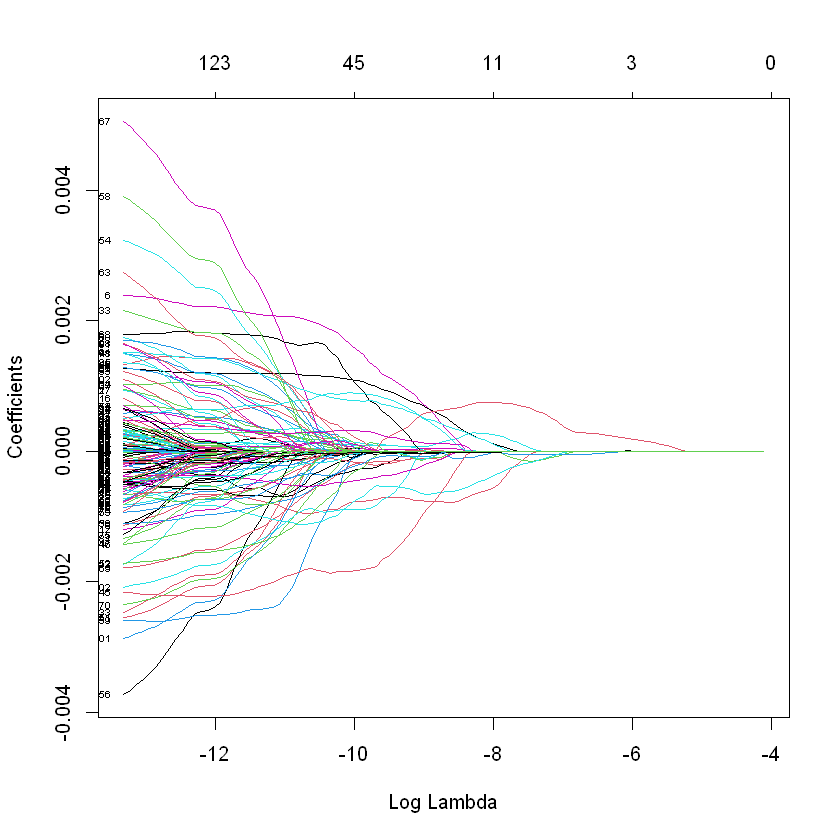

In [8]:
#LASSO
lasso_model <- glmnet(X, Y, alpha = 1)
##visualization
plot(lasso_model, xvar="lambda", label=TRUE)
print(lasso_model)

Warning message in plot.window(...):
""xvar" is not a graphical parameter"
Warning message in plot.window(...):
""label" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""xvar" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""label" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""xvar" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""label" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""xvar" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""label" is not a graphical parameter"
Warning message in box(...):
""xvar" is not a graphical parameter"
Warning message in box(...):
""label" is not a graphical parameter"
Warning message in title(...):
""xvar" is not a graphical parameter"
Warning message in title(...):
""label" is not a gra


Call:  cv.glmnet(x = X, y = Y, nfolds = 5, alpha = 1) 

Measure: Mean-Squared Error 

      Lambda Index   Measure        SE Nonzero
min 3.78e-06    91 0.0003445 4.194e-05     150
1se 5.12e-05    63 0.0003861 4.385e-05      37


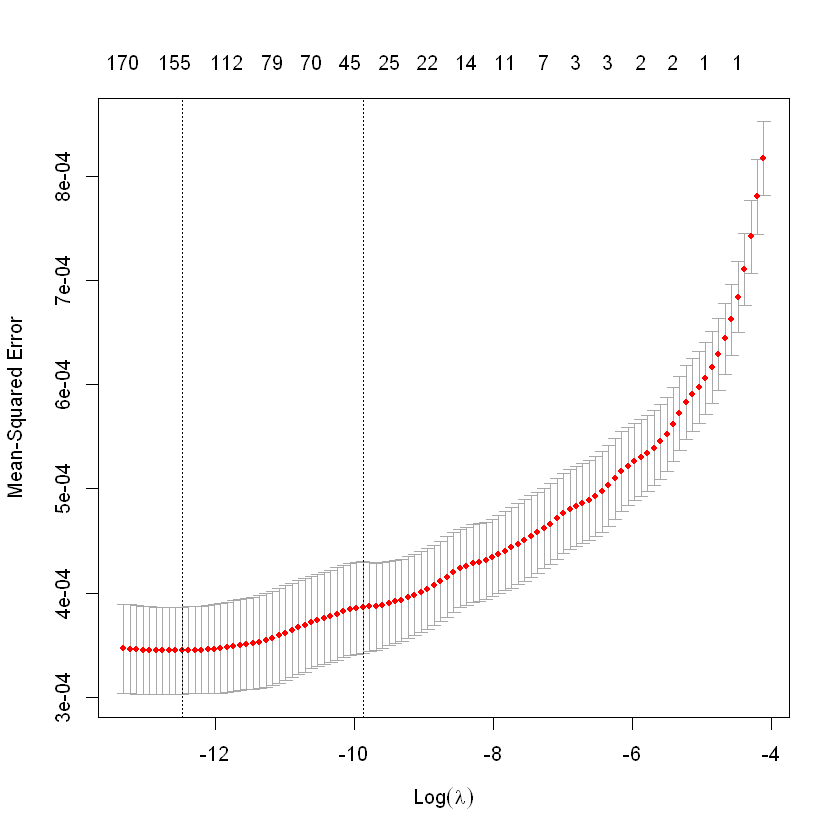

In [9]:
#cross validation
lasso_model <- cv.glmnet(x = X, y = Y, alpha = 1, nfolds = 5) 
#visualization
plot(lasso_model, xvar="lambda", label=TRUE)
print(lasso_model)

In [10]:
# Best lambda value
best_lambda <- lasso_model$lambda.min
# Fit the final Lasso model with the best lambda
final_model <- glmnet(x = X, y = Y, alpha = 1, lambda = best_lambda)
# Model Evaluation
predictions <- predict(final_model, s = best_lambda, newx = X)
mse <- mean((predictions - Y)^2)
mae <- mean(abs(predictions - Y))
# Feature Importance
coef(final_model)

205 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  3.130923e-03
5           -7.508284e-04
6           -7.863726e-05
7            .           
8            .           
9            1.327613e-04
10           1.918784e-03
11           4.382991e-04
12          -1.160911e-03
13          -6.269553e-05
14          -2.863442e-04
15           2.979320e-05
16          -1.515659e-03
17          -5.747788e-04
18          -5.774902e-04
19          -4.621547e-04
20          -8.057775e-04
21           8.032630e-04
22          -6.767644e-04
23           1.845669e-04
24          -1.354581e-07
25           1.224843e-04
26           .           
27          -7.508761e-04
28          -1.851699e-06
29          -4.250899e-06
30          -3.107451e-04
31           1.018039e-03
32          -3.730280e-04
33           .           
34           .           
35           .           
36           5.853464e-04
37          -2.701866e-03
38           3.346372e-04
39          -7.023375

In [11]:
# Load necessary libraries
library(forecast)

Warning message:
"package 'forecast' was built under R version 4.3.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [12]:
# 1 Month Ahead Forecasting
ts_1_month <- ts(Y, frequency = 12)  
model_1_month <- auto.arima(ts_1_month)
forecast_1_month <- forecast(model_1_month, h = 1)
print(forecast_1_month)

       Point Forecast       Lo 80      Hi 80        Lo 95      Hi 95
Mar 66     0.03156162 0.007405283 0.05571795 -0.005382308 0.06850554


In [13]:
# 3 Month Ahead Forecasting
ts_3_month <- ts(Y, frequency = 4) 
model_3_month <- auto.arima(ts_3_month)
forecast_3_month <- forecast(model_3_month, h = 3)
print(forecast_3_month)

       Point Forecast       Lo 80      Hi 80        Lo 95      Hi 95
196 Q3     0.03162559 0.007387380 0.05586381 -0.005443556 0.06869474
196 Q4     0.03161603 0.004916165 0.05831589 -0.009217888 0.07244994
197 Q1     0.03161264 0.004112121 0.05911316 -0.010445775 0.07367106


In [14]:
# 12 Month Ahead Forecasting
ts_12_month <- ts(Y, frequency = 1) 
model_12_month <- auto.arima(ts_12_month)
forecast_12_month <- forecast(model_12_month, h = 12)
print(forecast_12_month)

    Point Forecast       Lo 80      Hi 80        Lo 95      Hi 95
783     0.03162559 0.007387380 0.05586381 -0.005443556 0.06869474
784     0.03161603 0.004916165 0.05831589 -0.009217888 0.07244994
785     0.03161264 0.004112121 0.05911316 -0.010445775 0.07367106
786     0.03161145 0.003667625 0.05955527 -0.011124940 0.07434783
787     0.03161102 0.003325795 0.05989625 -0.011647500 0.07486955
788     0.03161087 0.003018786 0.06020296 -0.012116951 0.07533870
789     0.03161082 0.002725458 0.06049618 -0.012565530 0.07578717
790     0.03161080 0.002438683 0.06078292 -0.013004104 0.07622571
791     0.03161080 0.002155958 0.06106563 -0.013436491 0.07665808
792     0.03161079 0.001876361 0.06134523 -0.013864097 0.07708568
793     0.03161079 0.001599522 0.06162206 -0.014287485 0.07750907
794     0.03161079 0.001325268 0.06189632 -0.014706920 0.07792850
